<a href="https://colab.research.google.com/github/pltnhan/wazecustomerchurn/blob/main/waze_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Waze Project**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import sys
os.chdir('/content/drive/MyDrive/Projects/Customer Churn')
sys.path.append("/content/drive/MyDrive/Projects/Customer Churn")
!pwd

/content/drive/MyDrive/Projects/Customer Churn


## **1. Planning**

### Business scenario and problem
#### Scenario:
Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. Waze partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely.

#### Problem:
Prevent user churn on the Waze app. (Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app.)

#### What I'll do:
Analyze and interpret data, generate valuable insights, and help leadership make informed business decisions.

### **1.1. Import**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [4]:
df = pd.read_csv('./waze_dataset.csv')
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


### **1.2. Explore data**

In [ ]:
df.shape

(14999, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [ ]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


By assessing at the quartile values, standard deviation, and max values, the following columns all seem to have outliers:
<br>
* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`


*All of these columns have max values that are multiple standard deviations above the 75th percentile. This could indicate outliers in these variables.*

#### Missing values

In [ ]:
df.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

The `label` column is missing 700 values while others are not.

#### Duplicates

In [ ]:
df.duplicated().sum()

0

There is no duplicate in the dataset.

#### Outliers

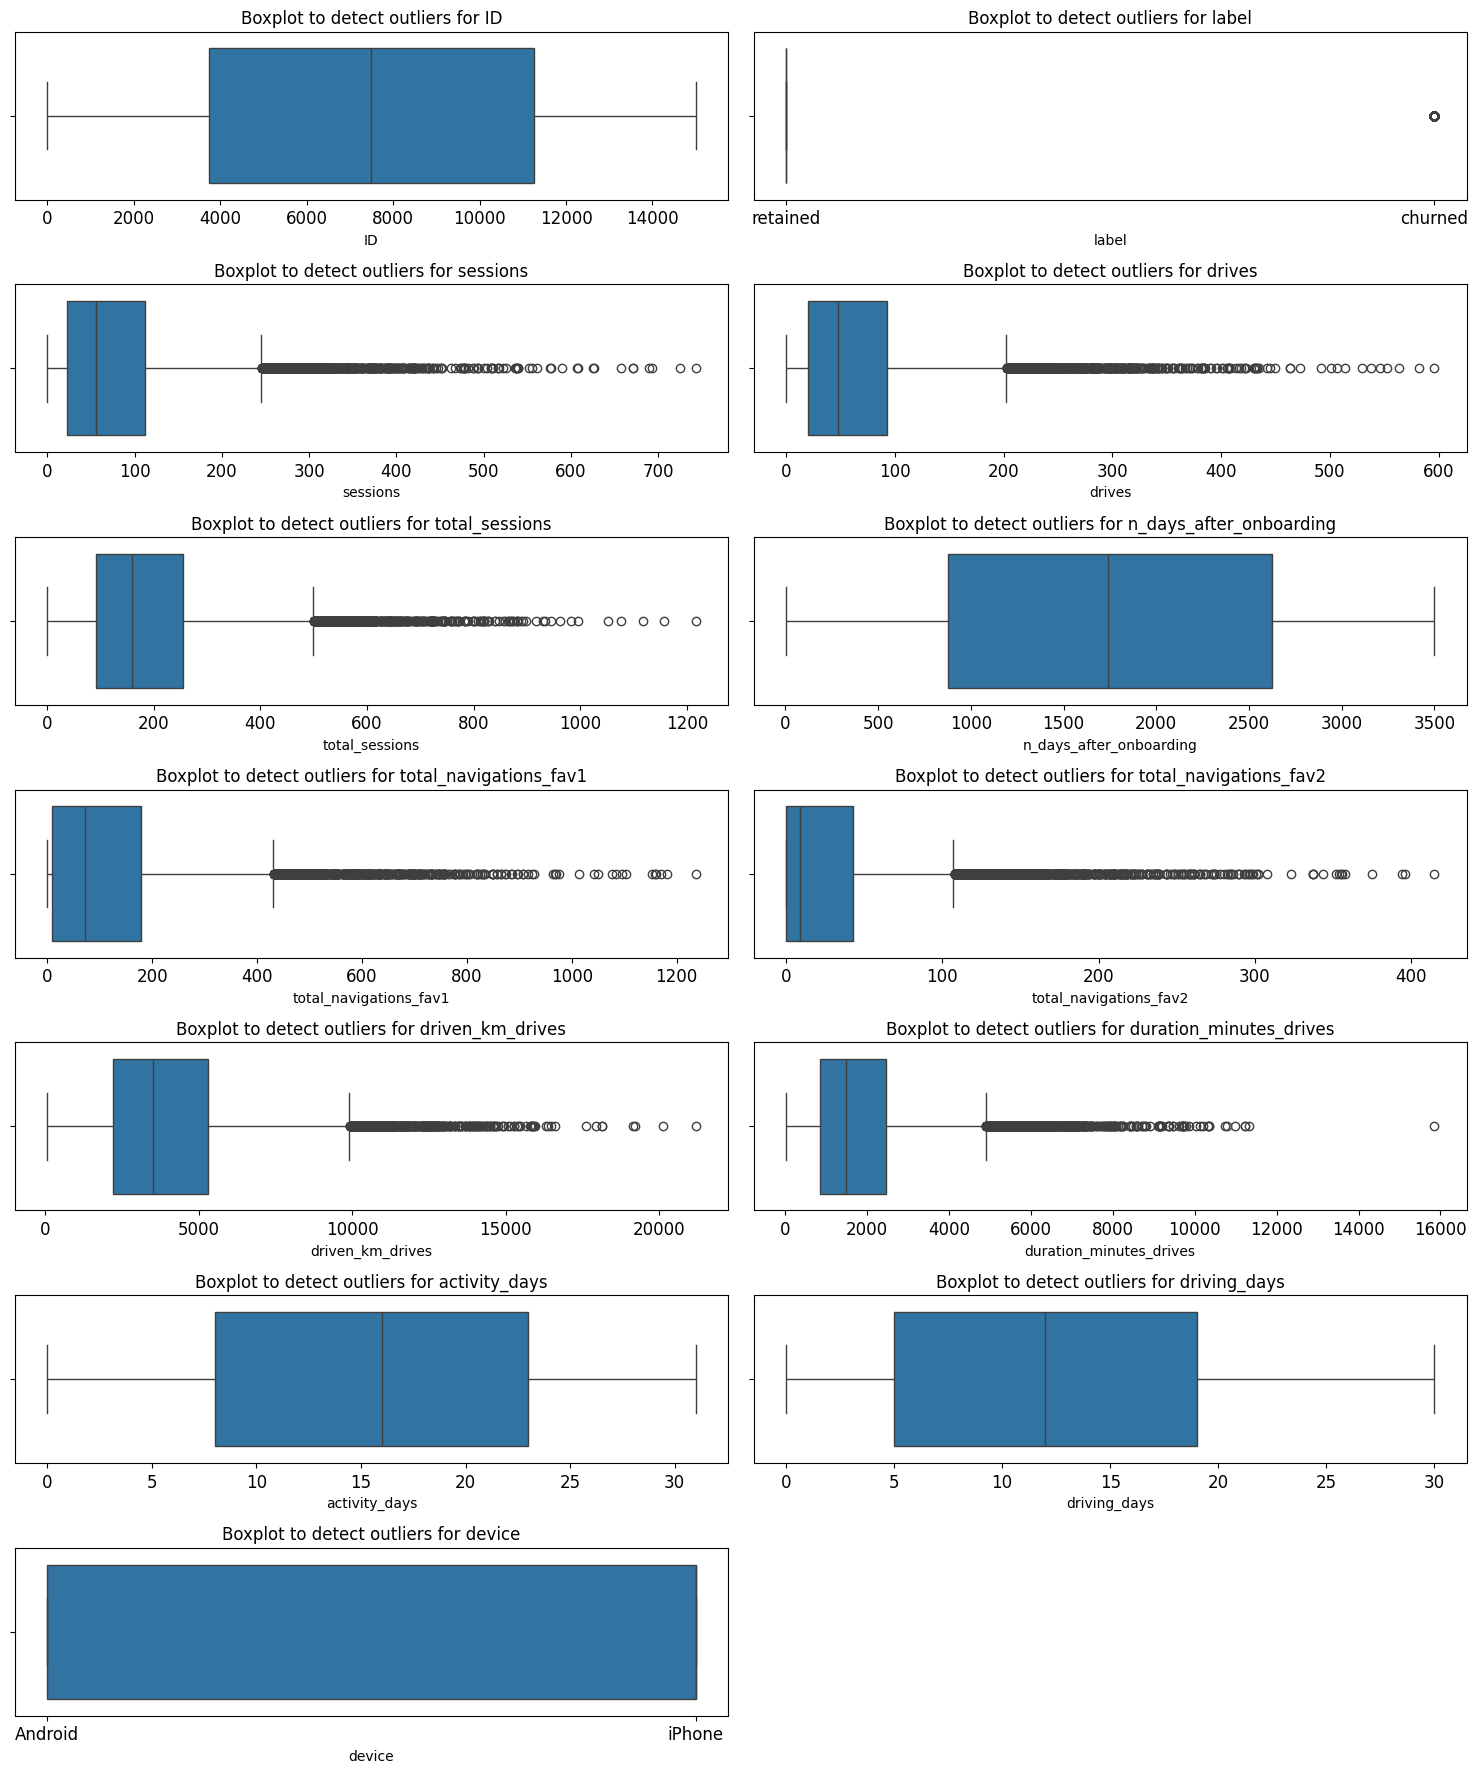

In [ ]:
plt.figure(figsize=(15,30))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, col in enumerate(df.columns):
    plt.subplot(12, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot to detect outliers for {col}', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Variables `sessions`, `drive`, `total_sessions`, `total_navigation_fav1`, `total_navigation_fav2`, `driven_km_drives`, and `duration_minutes_drives` contain utliers.


### **1.3. Prepare data**

#### **Deal with missing values**

Because 700 missing values in the `label` column comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [5]:
df = df.dropna(subset=['label'])

In [ ]:
df.shape

(14299, 13)

In [ ]:
df1 = df.copy()

#### **Encode categorical variables**

In [6]:
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [7]:
df['device2'] = np.where(df['device']=='iPhone', 1, 0)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


In [ ]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,label2,device2
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,0,0
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,0,1
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,0,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,0,1
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,0,0


#### **Drop unnecessary columns**

In [8]:
df = df.drop(columns=['ID'])
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,label2,device2
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,0,0
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,0,1
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,0,1
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,0,0


In [ ]:
df.shape

(14299, 14)

## **2. Analyzing**

### **2.1. Data Visualization**

#### **Distribution of each variable**

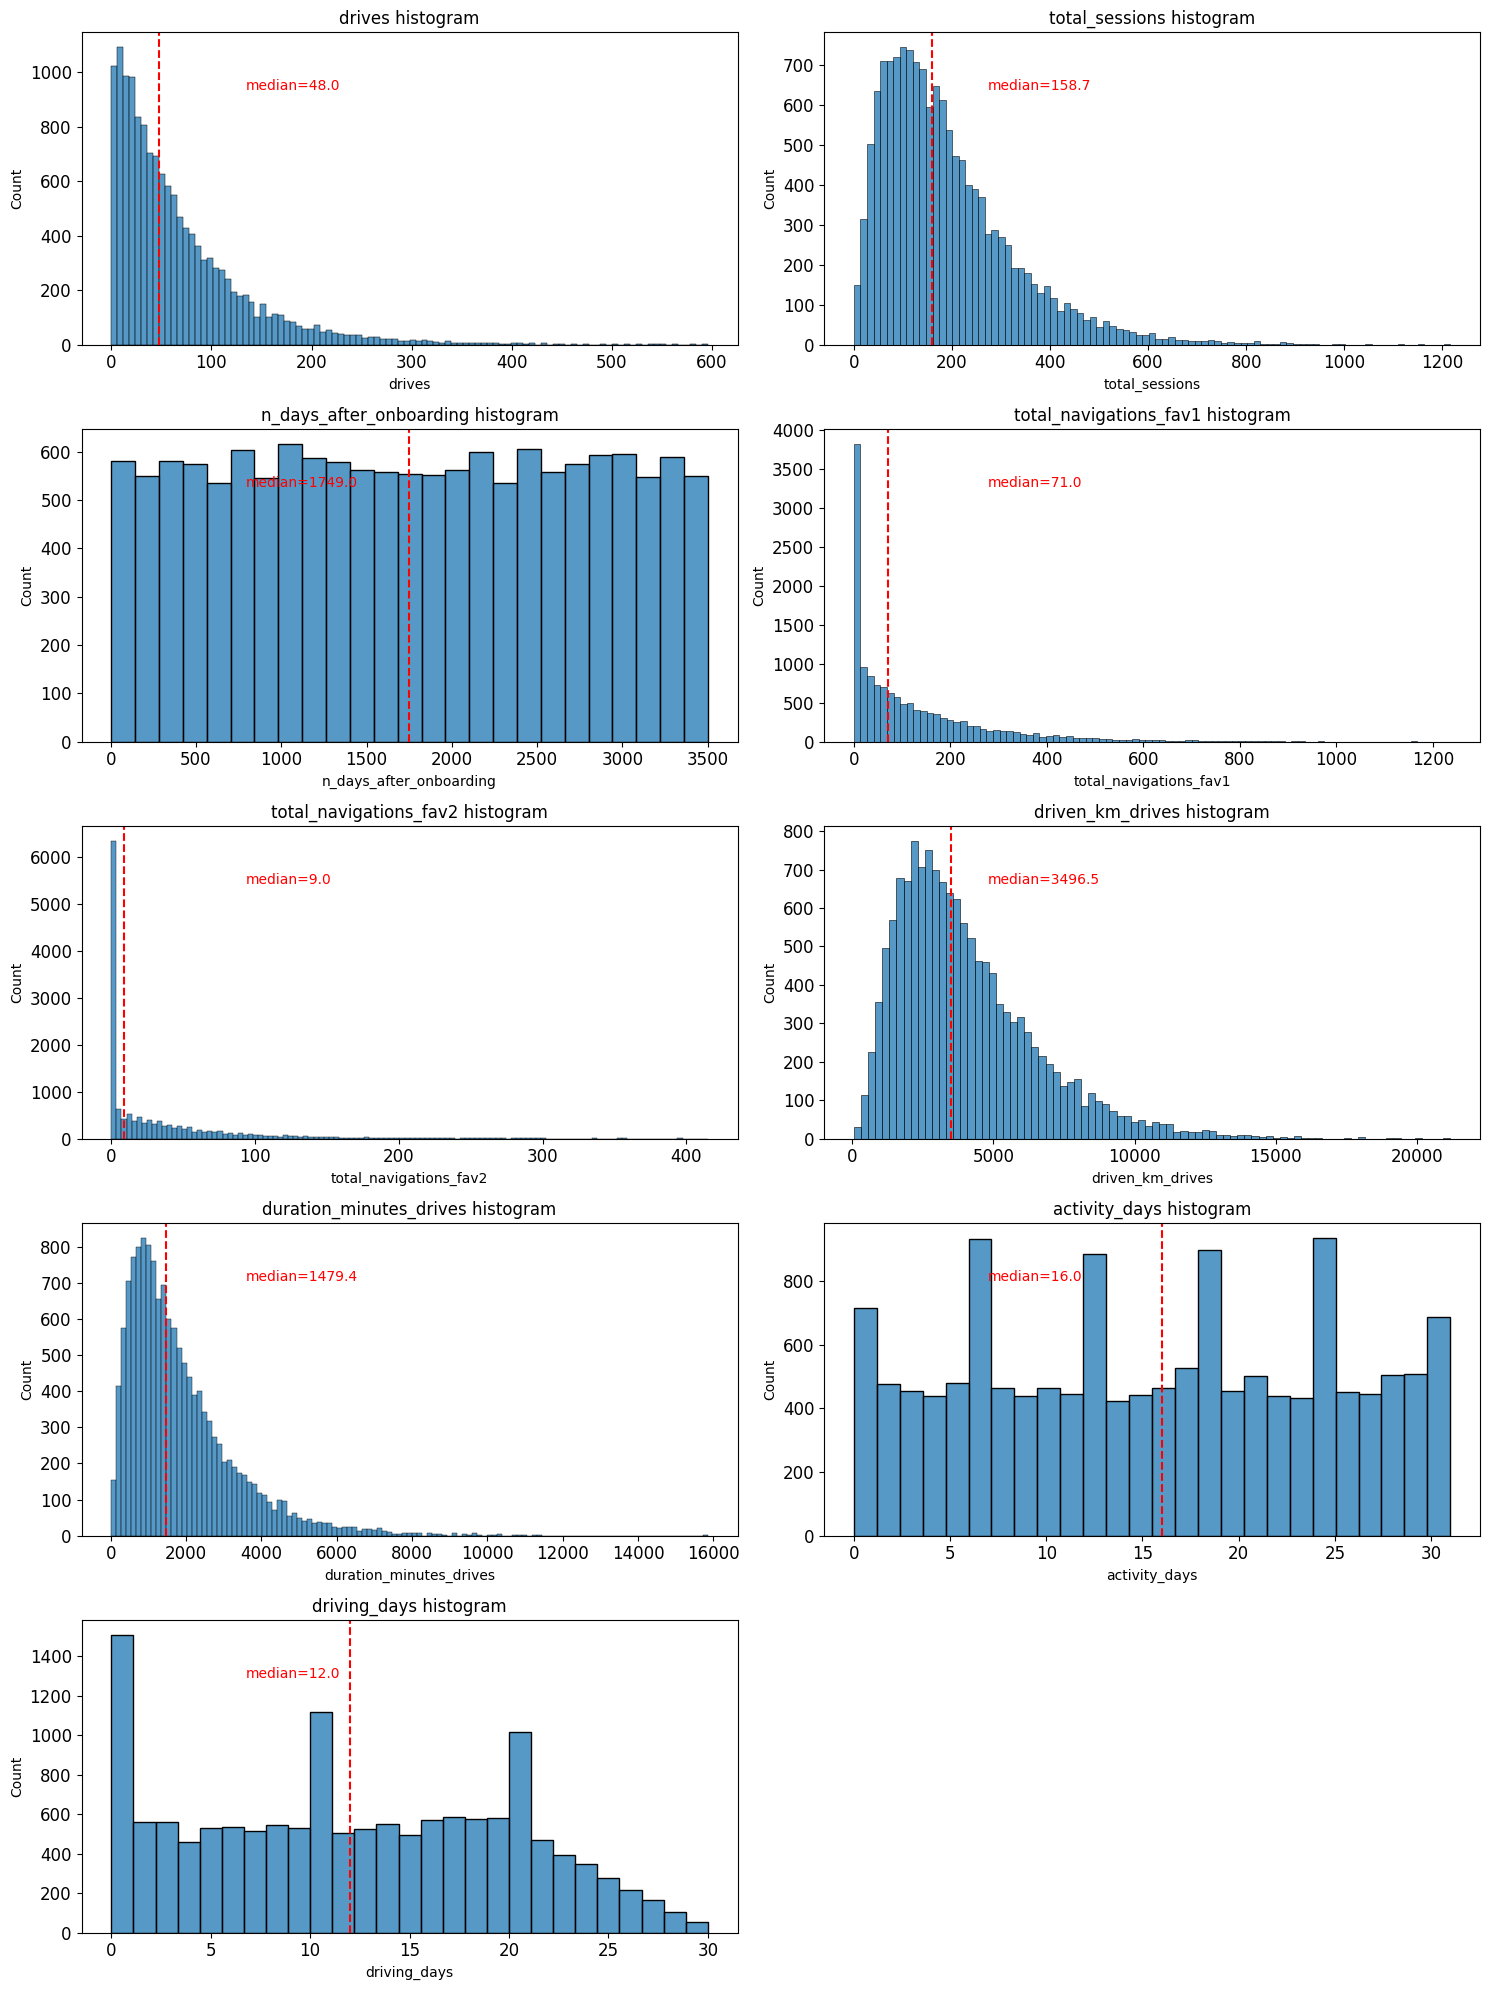

In [ ]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, col in enumerate(df.columns[2:-3]):
    plt.subplot(5, 2, i+1)
    median=round(df[col].median(), 1)
    ax=sns.histplot(x=df[col])
    plt.axvline(median, color='red', linestyle='--')
    ax.text(0.25, 0.85, f'median={median}', color='red',
        ha='left', va='top', transform=ax.transAxes)
    plt.title(f'{col} histogram', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

**`drives`**: is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

**`total_sessions`**: is a right-skewed distribution. The median total number of sessions is 158.7.

**`n_days_after_onboarding`**: is a uniform distribution with values ranging from near-zero to ~3,500 (~9.5 years).

**`driven_km_drives`**: is a right-skewed distribution with half the users driving under 3,496.5 kilometers.

**`activity_days`**: nearly uniform distribution of ~500 people opening the app on each count of days.

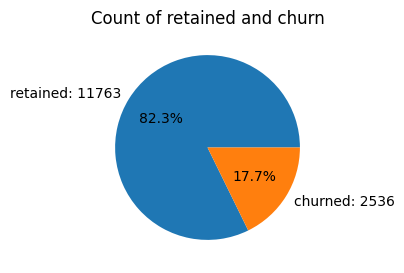

In [ ]:
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained and churn');

Less than 18% of the users churned.

#### **Retention by device**

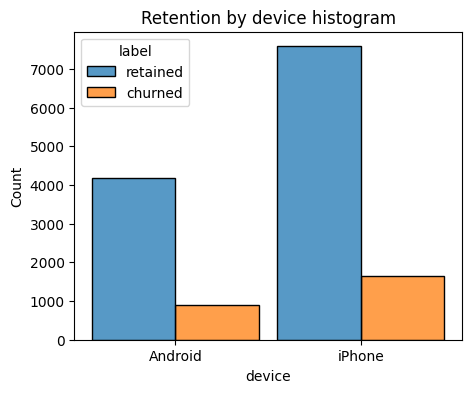

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In [9]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.608293e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [10]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

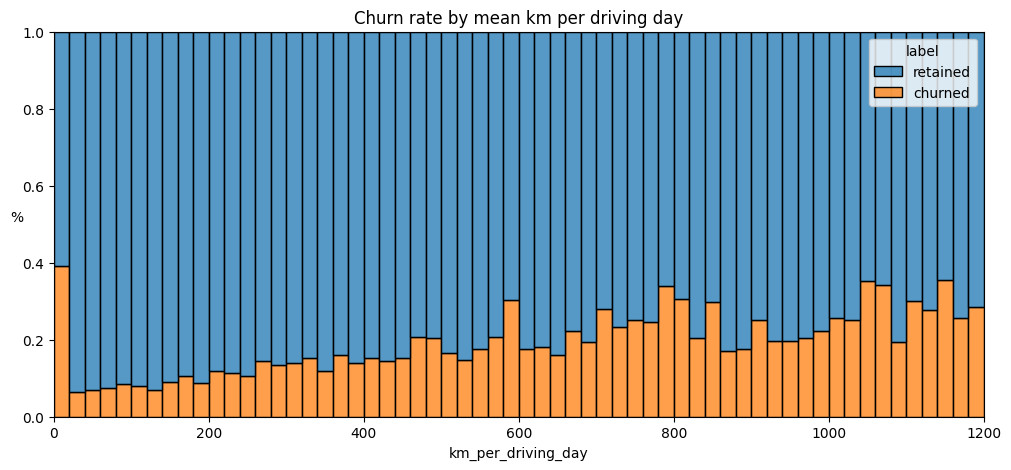

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases.

#### **Churn rate per number of driving days**

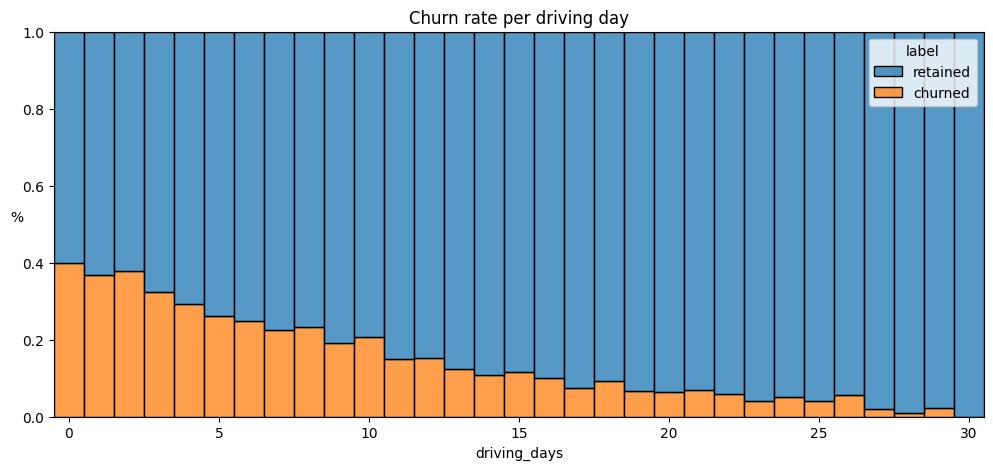

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn.

#### **Proportion of sessions that occured in the last month**

In [11]:
# The percentage of each user's total sessions that were logged in their last month of use.
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

In [ ]:
df['percent_sessions_in_last_month'].median()

0.4243102549137284

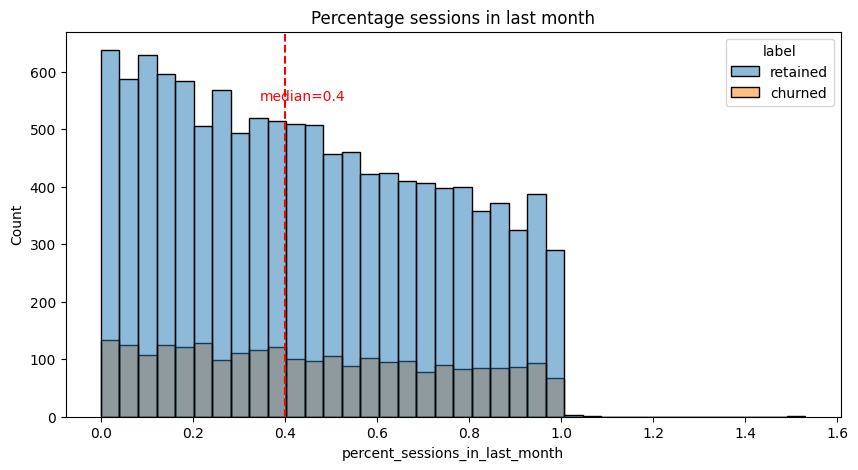

In [ ]:
plt.figure(figsize=(10,5))
median=round(df['percent_sessions_in_last_month'].median(), 1)
ax=sns.histplot(data=df,
             x='percent_sessions_in_last_month',
             hue='label',
             multiple='layer')
plt.axvline(median, color='red', linestyle='--')
ax.text(0.25, 0.85, f'median={median}', color='red',
    ha='left', va='top', transform=ax.transAxes)
plt.title('Percentage sessions in last month');

Half of customers had 40% or more sessions in just the last month.

In [ ]:
# Check the median value of the `n_days_after_onboarding` variable
df['n_days_after_onboarding'].median()

1749.0

It means the overall median time since onboarding is almost 5 years (~1749/365), but 40% or more of sessions are in the last month.

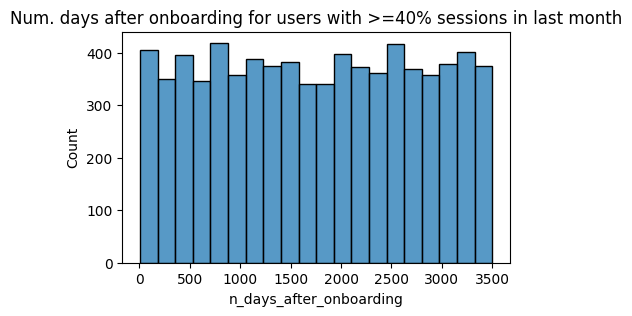

In [ ]:
# Histogram of n_days_after_onboarding for just the people who had 40% or more of their total sessions in the last month
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution.

This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

#### **Conclusion**

1. Nearly all the variables are either right-skewed or uniformly distributed.
* Right-skewed distributions means that most users had values in the lower end of the range for that variable.
* The uniform distributions means that users were generally equally likely to have values anywhere within the range for that variable.

2. Some variables have outlying vallues. However, it is not problematic as those outliers are imputed.

#### **Collinearity**

In [12]:
df2 = df.drop(columns=['label','device'])

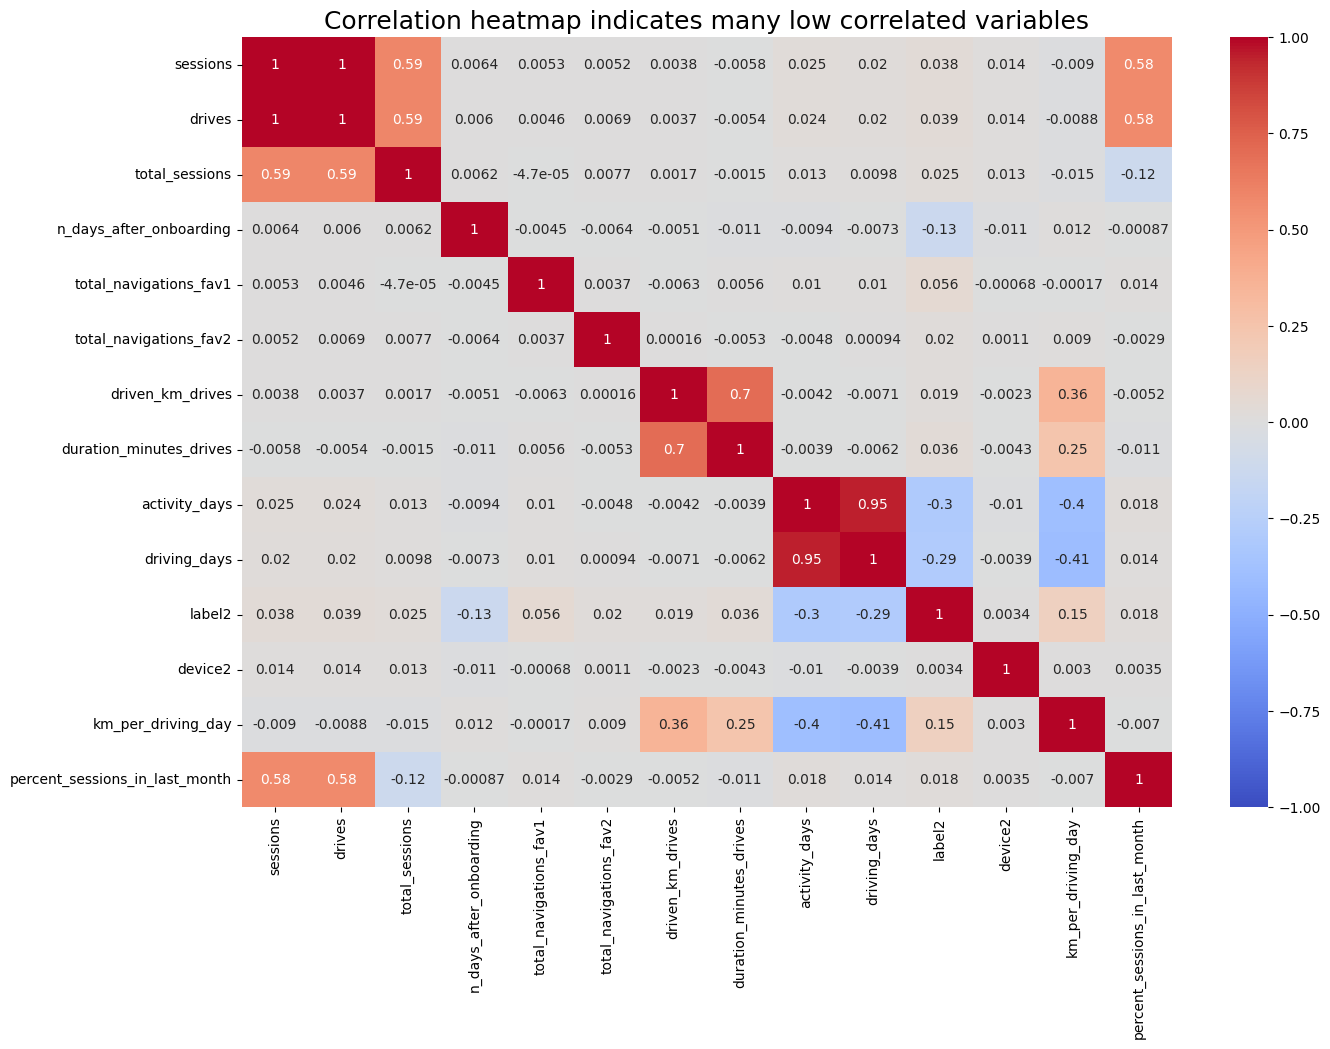

In [13]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show()

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

We set 0.7 as an arbitrary threshold. If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear.

> * *`sessions` and `drives`: 1.0*
<br>
> * *`driving_days` and `activity_days`: 0.95*
<br>
> * *`driven_km_drives` and `duration_minutes_drives`: 0.7*

In [14]:
df = df.drop(columns=['sessions', 'activity_days', 'duration_minutes_drives'])
df.head()

,label,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,driving_days,device,label2,device2,km_per_driving_day,percent_sessions_in_last_month
0,retained,226,296.748273,2276,208,0,2628.845068,19,Android,0,0,138.360267,0.953670
1,retained,107,326.896596,1225,19,64,13715.920550,11,iPhone,0,1,1246.901868,0.406856
2,retained,95,135.522926,2651,0,0,3059.148818,8,Android,0,0,382.393602,0.841186
3,retained,40,67.589221,15,322,7,913.591123,3,iPhone,0,1,304.530374,0.724968
4,retained,68,168.247020,1562,166,5,3950.202008,18,Android,0,0,219.455667,0.499266


In [ ]:
df.shape

(14299, 13)

### **2.2. Insights**

It appears that:
* Less than 18% of users churned.
* Distance driven per driving day (`km_per_driving_day`) had a positive correlation with user churn.
(*The farther a user drove on each driving day, the more likely they were to churn.*)
* On the other hand, number of activity days (`activity_days`) had a negative correlation with churn.
(*Users who logged into the app more days of the last month were less likely to churn.*)

#### **Impute outliers**

In [15]:
dfo = df.copy()

In [16]:
# Impute outliers
for column in ['drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

In [ ]:
df.head()

,label,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,driving_days,device,label2,device2,km_per_driving_day,percent_sessions_in_last_month
0,retained,200,296.748273,2276,208,0,2628.845068,19,Android,0,0,138.360267,0.953670
1,retained,107,326.896596,1225,19,64,8898.716275,11,iPhone,0,1,1246.901868,0.406856
2,retained,95,135.522926,2651,0,0,3059.148818,8,Android,0,0,382.393602,0.841186
3,retained,40,67.589221,15,322,7,913.591123,3,iPhone,0,1,304.530374,0.724968
4,retained,68,168.247020,1562,166,5,3950.202008,18,Android,0,0,219.455667,0.499266


In [ ]:
df.describe()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,driving_days,label2,device2,km_per_driving_day,percent_sessions_in_last_month
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,12.182530,0.177355,0.645150,581.942399,0.449837
std,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,7.833835,0.381982,0.478485,1038.254509,0.286863
min,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,5.000000,0.000000,0.000000,136.168003,0.196890
50%,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,12.000000,0.000000,1.000000,273.301012,0.424310
75%,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,19.000000,0.000000,1.000000,558.018761,0.687251
max,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,30.000000,1.000000,1.000000,15420.234110,1.530637


In [ ]:
dfo.describe()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,driving_days,label2,device2,km_per_driving_day,percent_sessions_in_last_month
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,12.182530,0.177355,0.645150,581.942399,0.449837
std,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,7.833835,0.381982,0.478485,1038.254509,0.286863
min,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,5.000000,0.000000,0.000000,136.168003,0.196890
50%,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,12.000000,0.000000,1.000000,273.301012,0.424310
75%,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,19.000000,0.000000,1.000000,558.018761,0.687251
max,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,30.000000,1.000000,1.000000,15420.234110,1.530637


## **3. Constructing**

### **Modeling Approach 1: Logistic Regression**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   label                           14299 non-null  object 
 1   drives                          14299 non-null  int64  
 2   total_sessions                  14299 non-null  float64
 3   n_days_after_onboarding         14299 non-null  int64  
 4   total_navigations_fav1          14299 non-null  int64  
 5   total_navigations_fav2          14299 non-null  int64  
 6   driven_km_drives                14299 non-null  float64
 7   driving_days                    14299 non-null  int64  
 8   device                          14299 non-null  object 
 9   label2                          14299 non-null  int64  
 10  device2                         14299 non-null  int64  
 11  km_per_driving_day              14299 non-null  float64
 12  percent_sessions_in_last_month  14299

In [17]:
# Assign predictors and target
X = df.drop(columns=['label','label2','device'])
y = df['label2']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [19]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [20]:
y_pred = log_clf.predict(X_test)

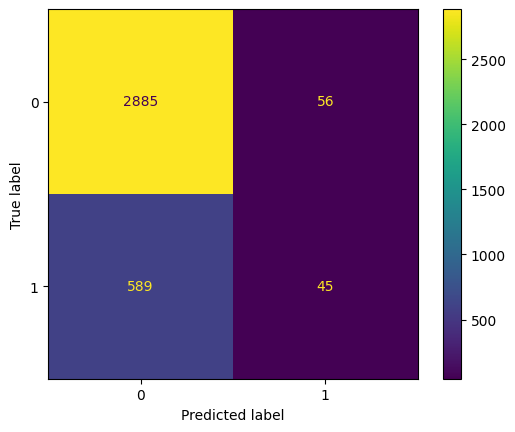

In [21]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [22]:
df['label2'].value_counts(normalize=True)

label2
0    0.822645
1    0.177355
Name: proportion, dtype: float64

There is an approximately 82%-18% split. So, the data is not balanced. It might be resampled to make it more balanced.

In [ ]:
target_names = ['Predicted retain', 'Predicted churn']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

Predicted retain       0.83      0.98      0.90      2941
 Predicted churn       0.49      0.08      0.13       634

        accuracy                           0.82      3575
       macro avg       0.66      0.53      0.52      3575
    weighted avg       0.77      0.82      0.76      3575



The classification report above shows that the logistic regression model achieved a precision of 77%, recall of 82%, f1-score of 76% (all weighted averages), and accuracy of 82%.

However, if it's most important to predict customers who churn, then the scores must be significantly lower.

### **Modeling Approach 2: Tree-based Model**

Decision Tree, Random Forest, and XGBoost

In [23]:
# Function to extract all scores from the grid search
def make_results(model_name:str, model_object, metric:str):
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [24]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

In [25]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [26]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [27]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   label                           14299 non-null  object 
 1   drives                          14299 non-null  int64  
 2   total_sessions                  14299 non-null  float64
 3   n_days_after_onboarding         14299 non-null  int64  
 4   total_navigations_fav1          14299 non-null  int64  
 5   total_navigations_fav2          14299 non-null  int64  
 6   driven_km_drives                14299 non-null  float64
 7   driving_days                    14299 non-null  int64  
 8   device                          14299 non-null  object 
 9   label2                          14299 non-null  int64  
 10  device2                         14299 non-null  int64  
 11  km_per_driving_day              14299 non-null  float64
 12  percent_sessions_in_last_month  14299

In [114]:
X = dfo.drop(columns=['label','device','label2'])
y = dfo['label2']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#### **Decision Tree**

In [116]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [117]:
%%time
tree1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

CPU times: user 13 s, sys: 32.3 ms, total: 13 s
Wall time: 15 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'precision', 'roc_auc', 'accuracy'})

In [118]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [119]:
# Check best AUC score on CV
tree1.best_score_

0.7302709151154674

This is a quite good AUC score. This model can predict customers who will churn.

In [120]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.290318,0.064087,0.100498,0.816766,0.730271


Only `Accuracy` and `AUC` scores can be good indicators of a good model performance. `Precision`, `Recall`, and `F1` are too low.

In [121]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
driving_days,0.754556
n_days_after_onboarding,0.198474
total_navigations_fav1,0.036345
drives,0.010626


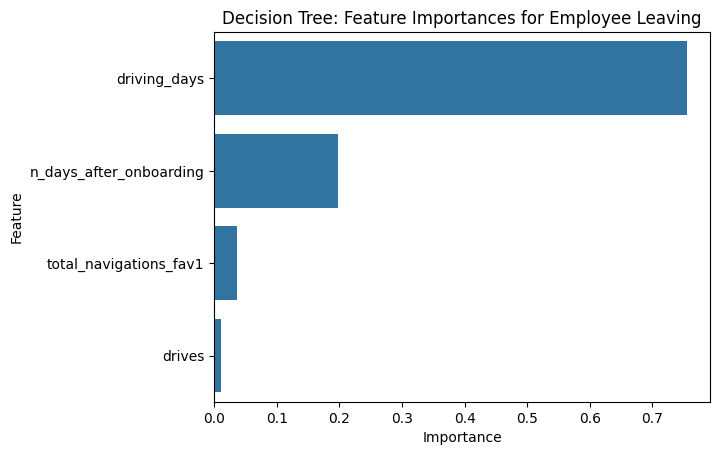

In [124]:
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Customer Churn", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `driving_days`, `n_day_after_onboarding`, `total_navigations_fav1`, and `drives` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

#### **XGBoost**

In [125]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [126]:
xgb1.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'precision', 'roc_auc', 'accuracy'})

In [127]:
xgb1.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 300}

In [128]:
xgb1.best_score_

0.7326456433874512

In [129]:
xgb1_cv_results = make_results('xgboost cv', xgb1, 'auc')
print(tree1_cv_results)
print(xgb1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.290318  0.064087  0.100498  0.816766  0.730271
        model  precision    recall        F1  accuracy       auc
0  xgboost cv   0.418332  0.056256  0.099156  0.818724  0.732646


In [130]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
xgb_importances = pd.DataFrame(xgb1.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
xgb_importances = xgb_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
xgb_importances = xgb_importances[xgb_importances['gini_importance'] != 0]
xgb_importances

,gini_importance
driving_days,0.485041
n_days_after_onboarding,0.097700
total_navigations_fav1,0.058319
drives,0.057118
total_sessions,0.052825
total_navigations_fav2,0.052612
percent_sessions_in_last_month,0.050141
driven_km_drives,0.049753
km_per_driving_day,0.049277
device2,0.047214


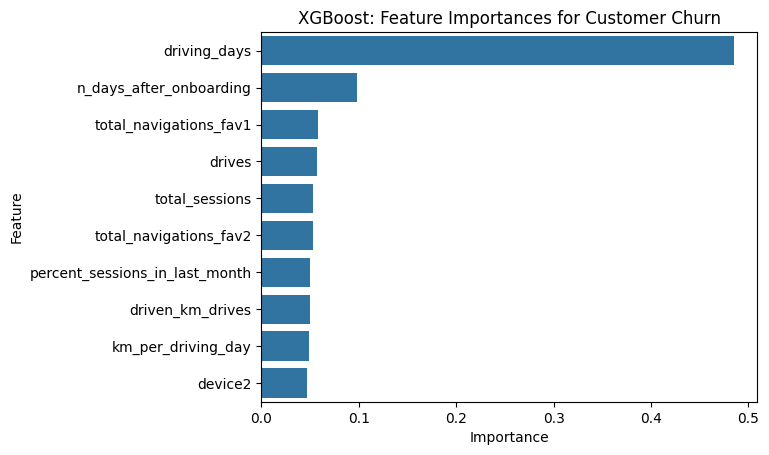

In [131]:
sns.barplot(data=xgb_importances, x="gini_importance", y=xgb_importances.index, orient='h')
plt.title("XGBoost: Feature Importances for Customer Churn", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

Based on the results of feature importance from two models, it can be concluded that `driving_days` and `n_day_after_onboarding` mostly affect to users' decision that will churn or retain .

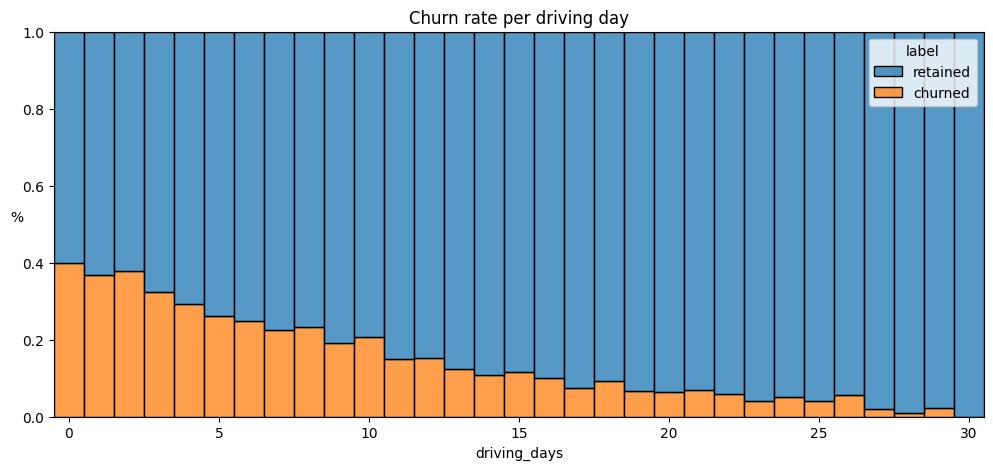

In [132]:
plt.figure(figsize=(12,5))
sns.histplot(data=dfo,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

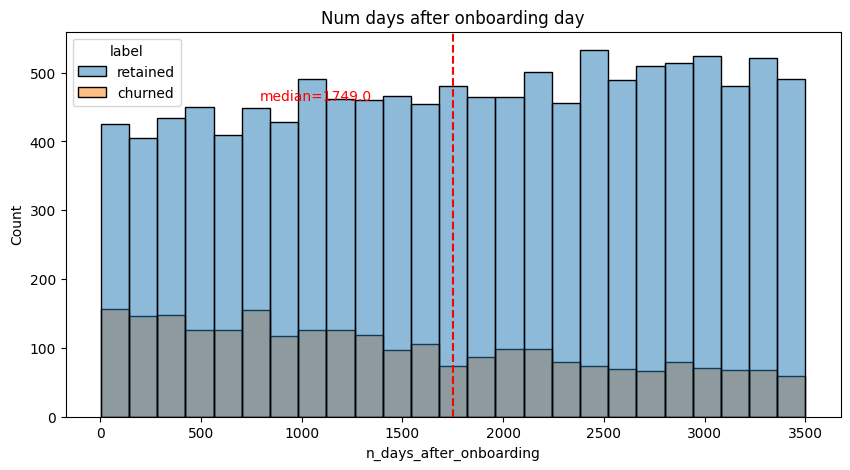

In [134]:
plt.figure(figsize=(10,5))
median=round(dfo['n_days_after_onboarding'].median(), 1)
ax=sns.histplot(data=df,
             x='n_days_after_onboarding',
             hue='label',
             multiple='layer')
plt.axvline(median, color='red', linestyle='--')
ax.text(0.25, 0.85, f'median={median}', color='red',
    ha='left', va='top', transform=ax.transAxes)
plt.title('Num days after onboarding day');

**The more driving days in the last month or the longer time installed the app means that users do not churn.**